/tmp/ipython-input-825960257.py:33: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 37.2k/37.2k [00:00<00:00, 2.55MB/s]

Dataset Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



--- Decision Tree Performance ---
Accuracy: 0.8731707317073171
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205


--- Random Forest Performance ---
Accuracy: 0.9609756097560975
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.95      0.97      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



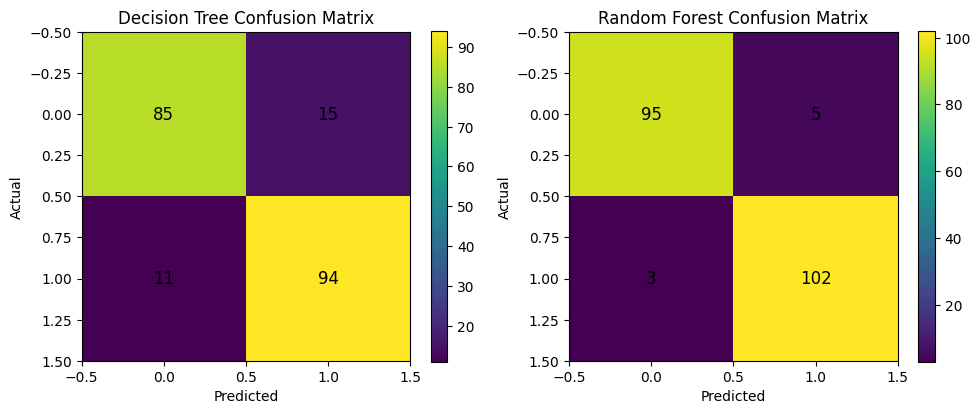

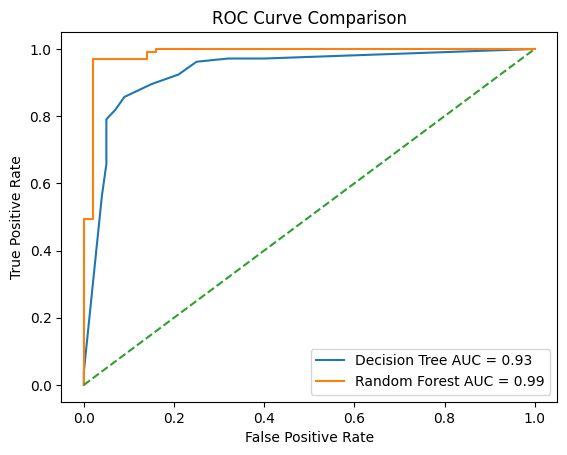

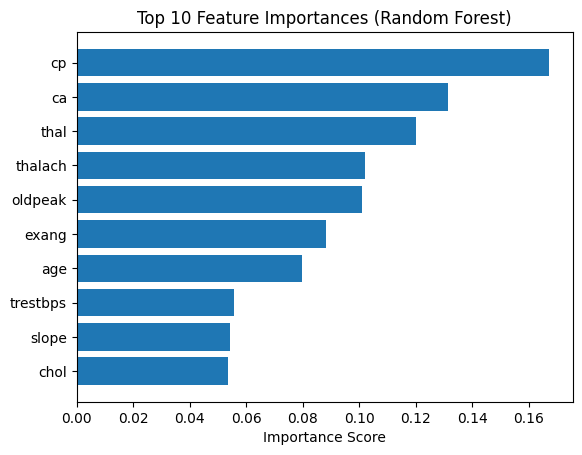

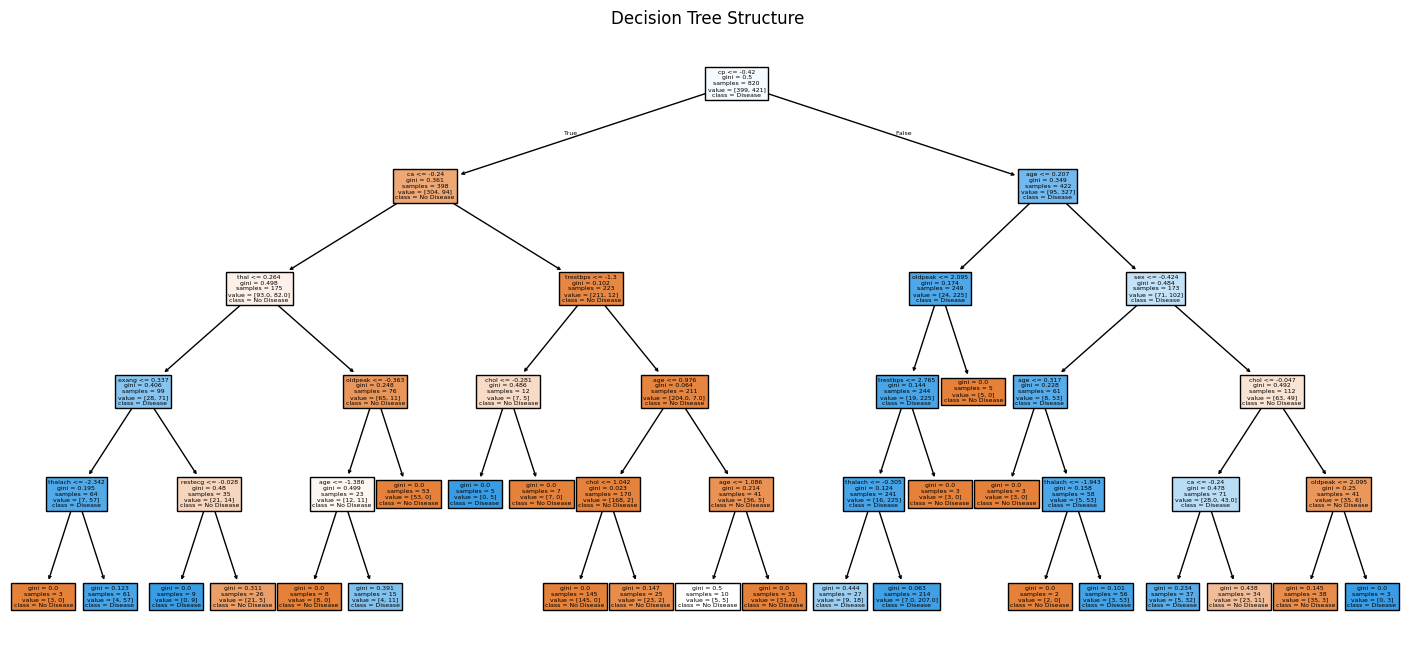

In [1]:
# ==============================
# EXPERIMENT 3
# Decision Tree & Random Forest
# Heart Disease Classification
# ==============================

# Install KaggleHub
!pip install kagglehub -q

# Imports
import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# --------------------------
# Load Dataset
# --------------------------
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "johnsmith88/heart-disease-dataset",
    "heart.csv"
)

print("Dataset Shape:", df.shape)
display(df.head())

# --------------------------
# Feature & Target Split
# --------------------------
X = df.drop("target", axis=1)
y = df["target"]

# --------------------------
# Train-Test Split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# --------------------------
# Feature Scaling
# --------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# Decision Tree Classifier
# ==========================
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)
dt_preds = dt.predict(X_test_scaled)
dt_probs = dt.predict_proba(X_test_scaled)[:, 1]

print("\n--- Decision Tree Performance ---")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

# ==========================
# Random Forest Classifier
# ==========================
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]

print("\n--- Random Forest Performance ---")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# ==========================
# Confusion Matrices (WITH NUMBERS)
# ==========================
cm_dt = confusion_matrix(y_test, dt_preds)
cm_rf = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(10, 4))

# Decision Tree
plt.subplot(1, 2, 1)
plt.imshow(cm_dt)
plt.title("Decision Tree Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        plt.text(j, i, cm_dt[i, j],
                 ha="center", va="center", fontsize=12)

# Random Forest
plt.subplot(1, 2, 2)
plt.imshow(cm_rf)
plt.title("Random Forest Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, cm_rf[i, j],
                 ha="center", va="center", fontsize=12)

plt.tight_layout()
plt.show()

# ==========================
# ROC Curves
# ==========================
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure()
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree AUC = {auc(dt_fpr, dt_tpr):.2f}")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest AUC = {auc(rf_fpr, rf_tpr):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# ==========================
# Feature Importance (RF)
# ==========================
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure()
plt.barh(X.columns[indices], importances[indices])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

# ==========================
# Decision Tree Visualization
# ==========================
plt.figure(figsize=(18, 8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True
)
plt.title("Decision Tree Structure")
plt.show()